In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Загрузка и первичный анализ данных с видеохостинга

In [9]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [10]:
import io
netflix_overall = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))

In [11]:
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Имеется 12 признаков для анализа(есть пропуски в некоторых признаках)

In [13]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

In [14]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()


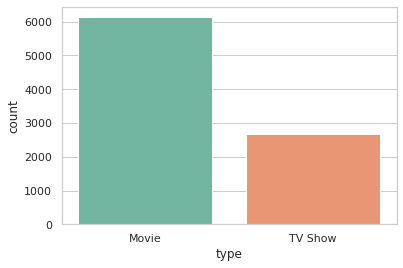

In [15]:
sns.set(style='whitegrid')
ax = sns.countplot(x = 'type', data = netflix_overall, palette = 'Set2')

Фильмов более чем в два раза больше, чем сериалов

In [16]:
topdurations = pd.value_counts(netflix_overall['duration'])
topdurations

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [17]:
from plotly import graph_objects as go

fig = go.Figure ([
    go.Bar(x = topdurations.index, y = topdurations.values)
])
fig.show()

Перейдём к изучению фильмов

## Самое лучшее время для релиза своего контента

Рассмотрим, в какое время чаще всего выпускаются релизы?

In [18]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [20]:
netflix_date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [21]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [22]:
netflix_date.sort_values(by = ['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


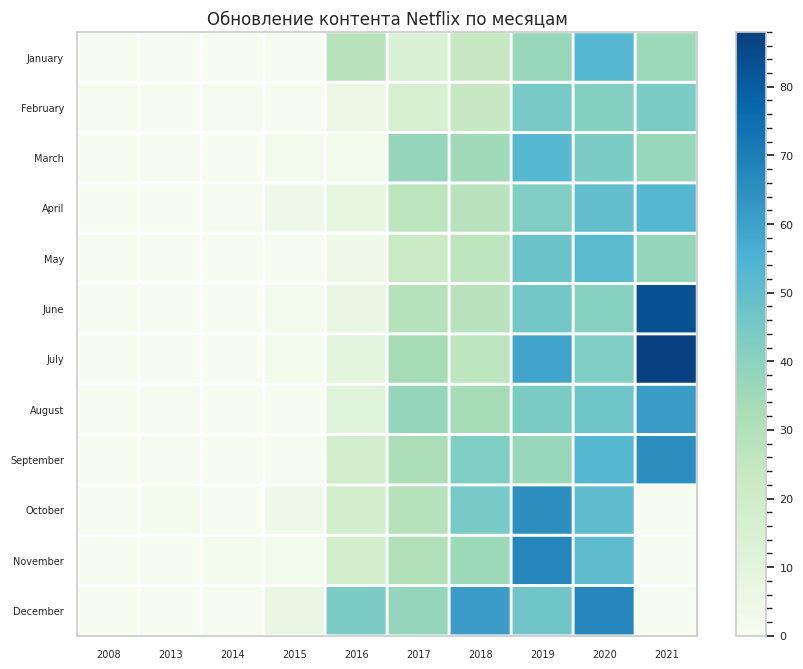

In [24]:
plt.pyplot.figure(figsize=(10,8), dpi=100)
plt.pyplot.pcolor(df, cmap = 'GnBu', edgecolors = 'white', linewidths = 2)
plt.pyplot.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.pyplot.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.pyplot.title('Обновление контента Netflix по месяцам')
cbar = plt.pyplot.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.pyplot.show()

По итогу можно сказать, что январь и декабрь - лучшие месяца для выпуска своего контента, а чаще всего фильмы выпускались летом и осенью, поэтому мы можем обосновать наш выбор

## Анализ возрастных рейтингов 

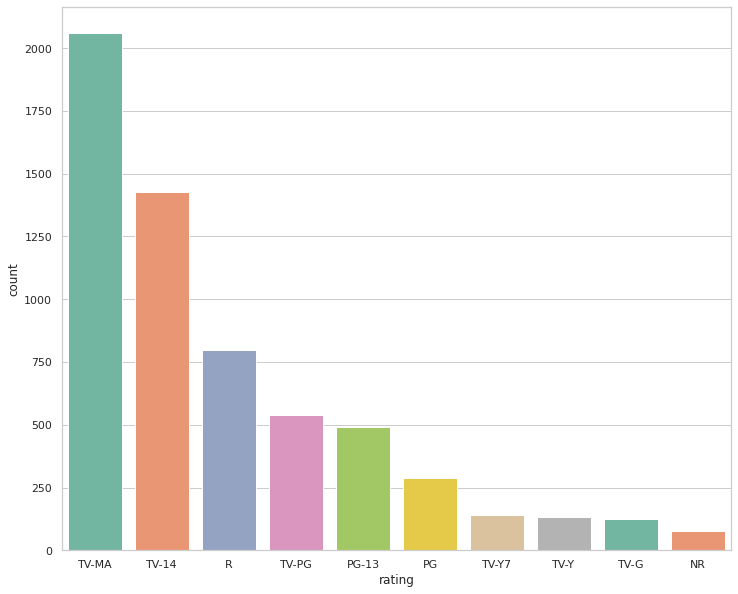

In [25]:
plt.pyplot.figure(figsize=(12,10))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:10])

## Анализ года выпуска фильма

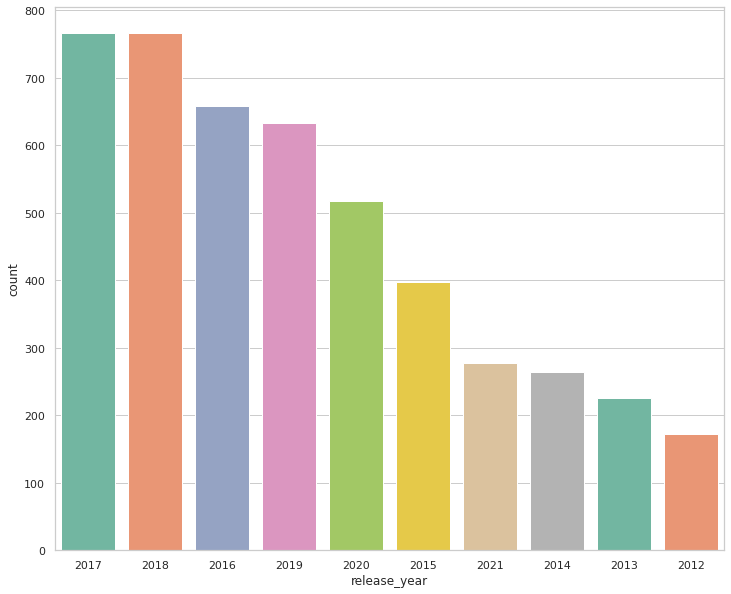

In [26]:
plt.pyplot.figure(figsize=(12,10))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'release_year', data = netflix_movies, palette = 'Set2', order = netflix_movies['release_year'].value_counts().index[0:10])

## Анализ стран, выпускающих фильмы

In [27]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [28]:
netflix_movies['country'].fillna('Unknown', inplace = True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [29]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [30]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1


In [31]:
countries_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [32]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse = True)
countries_fin = countries_fin[:15]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114),
 ('Mexico', 111),
 ('Egypt', 102),
 ('HongKong', 100),
 ('Nigeria', 94),
 ('Australia', 94)]

In [33]:
names = [name for name, value in countries_fin]
values = [value for name, value in countries_fin]

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Egypt'),
 Text(0, 0, 'HongKong'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Australia')]

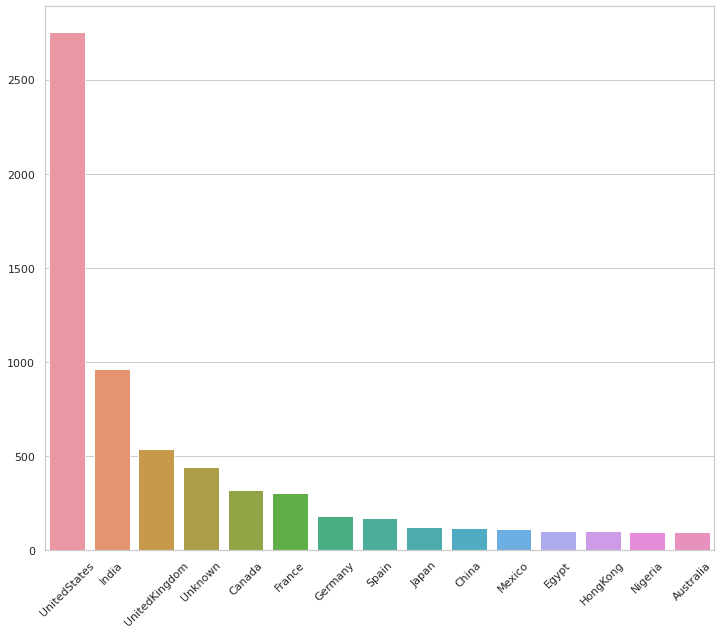

In [34]:
plt.pyplot.figure(figsize=(12,10))
ax = sns.barplot(x=names, y = values)
ax.set_xticklabels(names, rotation = 45)

## Анализ продолжительности фильма

In [35]:
netflix_movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [36]:
netflix_movies['duration'].isna().sum()

3

In [37]:
netflix_movies['duration'].fillna(0, inplace = True)
netflix_movies['duration'].isna().sum()

0

In [38]:
netflix_movies['duration'].isna().sum()

0

In [42]:
netflix_movies.dropna(inplace = True)
netflix_movies['duration'].isna().sum()
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
netflix_movies['duration']

6        91
7       125
9       104
12      127
13       91
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5518, dtype: int64

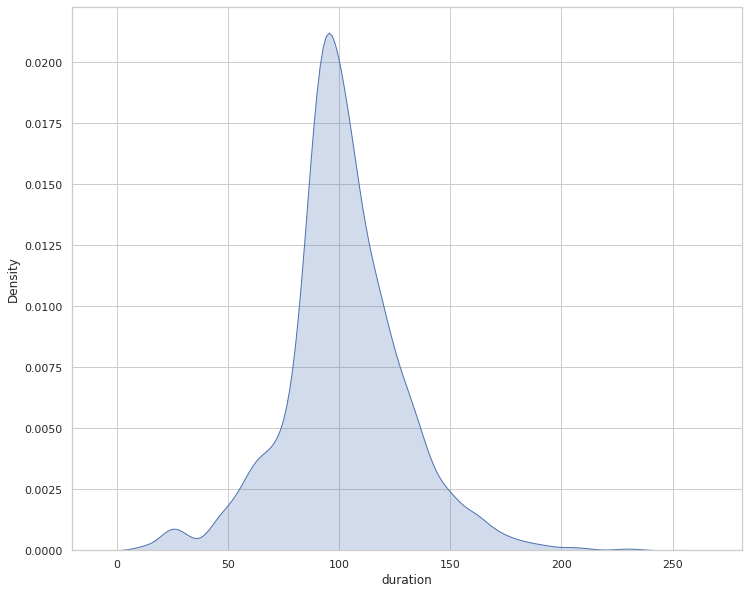

In [43]:
plt.pyplot.figure(figsize=(12,10))
sns.set(style = 'whitegrid')
sns.kdeplot(data = netflix_movies['duration'], shade=True)

## Анализ признаков сериалов

## Анализ стран, которые выпускают сериалы

In [44]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [45]:
netflix_shows['country'].fillna('Unknown', inplace = True)

In [46]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [47]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1

In [48]:
countries_show

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

In [49]:
countries_fin2 = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse = True)
countries_fin2 = countries_fin2[:10]
countries_fin2

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [50]:
names = [name for name, value in countries_fin2]
values = [value for name, value in countries_fin2]

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'SouthKorea'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'France'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Australia')]

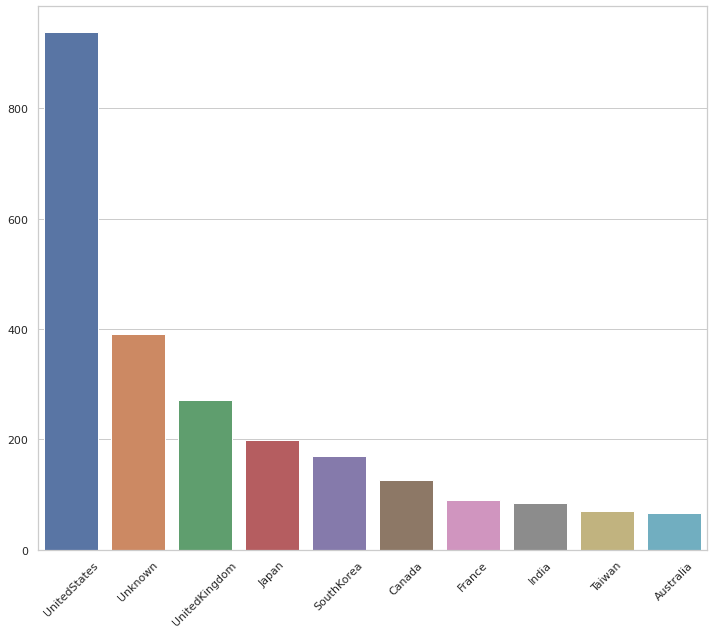

In [51]:
plt.pyplot.figure(figsize=(12,10))
ax = sns.barplot(x=names, y = values)
ax.set_xticklabels(names, rotation = 45)

## Анализ длительности сериалов

In [52]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [53]:
durations['no_of_seasons'] = durations['duration'].str.replace('Season','')
durations

<ipython-input-53-e819fe796142>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2 s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2 s
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 s
8796,Yunus Emre,2 Seasons,2 s
8797,Zak Storm,3 Seasons,3 s
8800,Zindagi Gulzar Hai,1 Season,1


In [54]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')
durations

<ipython-input-54-0ee957975da5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [55]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-55-594b2c56087a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
t = ['title','no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending = False)

([<matplotlib.axis.XTick at 0x7ff33abb72e0>,
 <a list of 20 Text major ticklabel objects>)

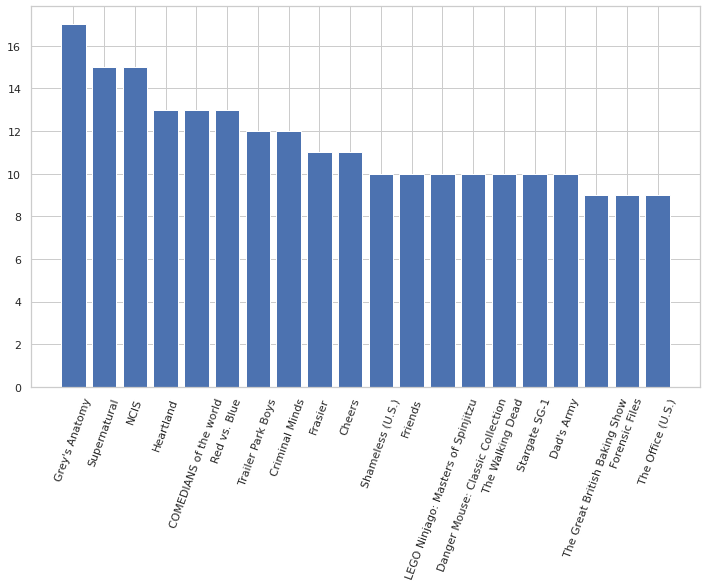

In [57]:
top20 = top[0:20]
plt.pyplot.figure(figsize=(12,7))

plt.pyplot.bar(top20['title'], top20['no_of_seasons'])
plt.pyplot.xticks(top20['title'], rotation=70)

## Анализ жанров и продолжительности сериала

In [58]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [59]:
from collections import Counter
genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

In [60]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse=True)
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [61]:
genre_names = [name for name, value in g]
genre_values = [value for name, value in g]

Text(0.5, 1.0, 'Жанры')

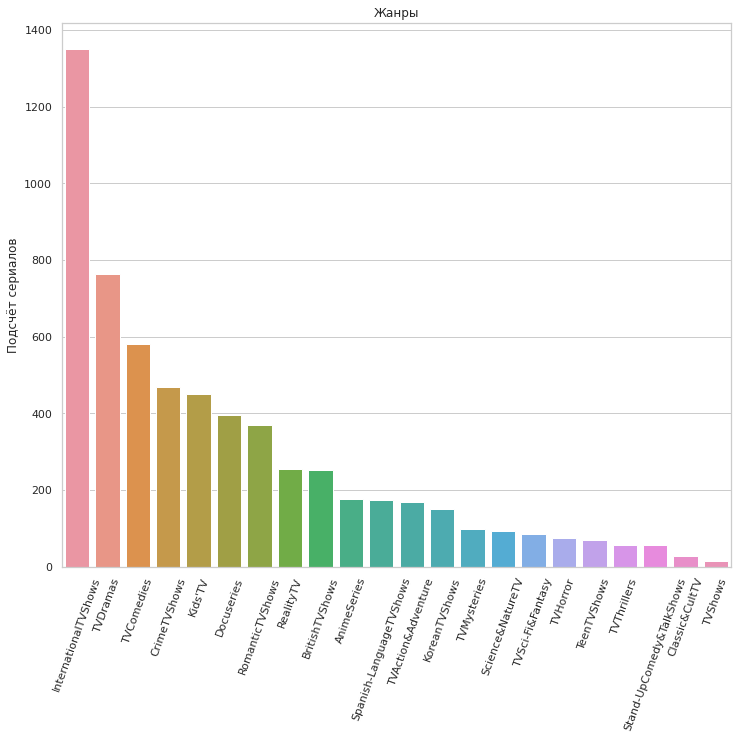

In [62]:
fig = plt.pyplot.figure(figsize = (12,10))
ax = sns.barplot(x=genre_names, y = genre_values)
ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel('Подсчёт сериалов')
ax.set_title('Жанры')

## Продолжительность по сезонам

([<matplotlib.axis.XTick at 0x7ff3391b1ee0>,
 <a list of 15 Text major ticklabel objects>)

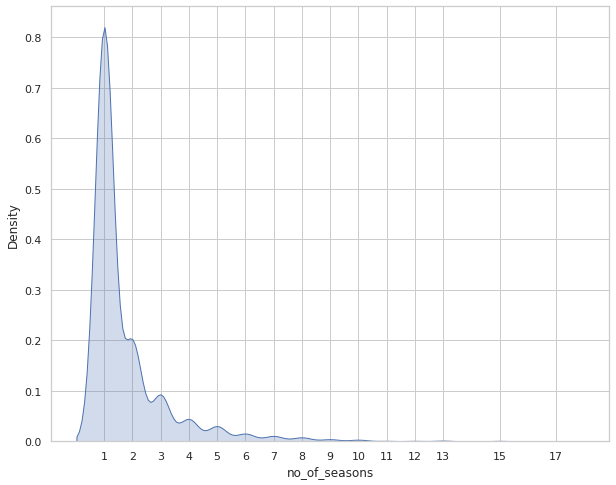

In [63]:
plt.pyplot.figure(figsize=(10,8))
sns.kdeplot(data=durations['no_of_seasons'], shade=True)
plt.pyplot.xticks(sorted(durations['no_of_seasons'].unique()))

# Создание системы рекомендаций


Система рекомендаций будет основана на методе TF-IDF и косинусовой похожести, благодаря чему мы сможем создать функцию, которая по описанию будет рекомендовать похожие фильмы и сериалы

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isna().sum()

0

In [66]:
netflix_movies['description'].head()

6     Equestria's divided. But a bright-eyed hero be...
7     On a photo shoot in Ghana, an American model s...
9     A woman adjusting to life after a loss contend...
12    After most of her family is murdered in a terr...
13    When the clever but socially-awkward Tetê join...
Name: description, dtype: object

In [67]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(netflix_movies['description'])

tfidf_matrix.shape

(5518, 14498)

Теперь определим метод через косинусовую похожесть и напишем функцию

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.03579085],
       [0.        , 0.        , 1.        , ..., 0.06074175, 0.01778164,
        0.04525036],
       ...,
       [0.        , 0.        , 0.06074175, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01778164, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03579085, 0.04525036, ..., 0.        , 0.        ,
        1.        ]])

In [69]:
cosine_sim.shape

(5518, 5518)

In [70]:
indices = pd.Series(netflix_movies.index, index = netflix_movies['title'].drop_duplicates())


In [71]:
cosine_sim_df =pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,Jeans,Minsara Kanavu,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
My Little Pony: A New Generation,1.0,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.0,1.0,0.00000,0.00000,0.0,0.000000,0.029521,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035791
The Starling,0.0,0.0,1.00000,0.02815,0.0,0.000000,0.000000,0.0,0.021076,0.024527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060742,0.017782,0.045250
Je Suis Karl,0.0,0.0,0.02815,1.00000,0.0,0.000000,0.000000,0.0,0.024519,0.028533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028320
Confessions of an Invisible Girl,0.0,0.0,0.00000,0.00000,1.0,0.021374,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.018541,0.000000


In [72]:
def get_recommend_idf(title, cosine_sim=cosine_sim_df):
    idx = indices[title]
    #Принимаем похожести для этого фильма
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))
    
    #Сортируем фильмы по похожести
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    #Принимаем индексы фильма
    movie_indices = [i[0] for i in sim_scores]
    
    return netflix_movies['title'].iloc[movie_indices]
    

In [73]:
netflix_movies[netflix_movies['title'] == 'Brain on Fire'].description.iloc[0]

'Stricken with seizures, psychosis and memory loss, a young New York Post reporter visits doctor after doctor in search of an elusive diagnosis.'

In [74]:
netflix_movies['title'].sample()

7072    Indiana Jones and the Raiders of the Lost Ark
Name: title, dtype: object

In [75]:
get_recommend_idf('Brain on Fire')

244                                               Gunshot
5546                                 Five Nights in Maine
7437                                                Melle
5442                                             Headshot
6153    An American Tail: The Mystery of the Night Mon...
8648                                           Two Graves
3439                          Home Is Where the Killer Is
229                                          The Old Ways
8095                                   Stonehearst Asylum
3818                                             Good Sam
Name: title, dtype: object

In [76]:
netflix_movies[netflix_movies['title'] == 'Gunshot'].description.iloc[0]

'After a clash at a protest ends in bloodshed, a forensic doctor and a journalist embark on a search for the elusive truth.'

In [77]:
cosine_sim_df['Brain on Fire'].sort_values(ascending = False)

title
Brain on Fire              1.000000
Gunshot                    0.246185
Five Nights in Maine       0.163315
Melle                      0.138237
Headshot                   0.134225
                             ...   
Brother in Love            0.000000
Noblemen                   0.000000
Love for Sale              0.000000
Deon Cole: Cole Hearted    0.000000
Zubaan                     0.000000
Name: Brain on Fire, Length: 5518, dtype: float64

В конечном счете, мы осуществили EDA - первичный разводочный анализ данных, выяснили определенные факты о площадке Netflix, её фильмах и сериалах, а также решили Data Sciene - бизнес-задачу -  создали систему рекомендаций, при помощи метода TF - IDF и косинусовой похожести, чтобы рекомендовать фильмы на основе их описания.